In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
dataset = pd.read_csv('Mall_Customers.csv')

In [21]:
dataset.set_index('CustomerID', inplace=True)

In [23]:
dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


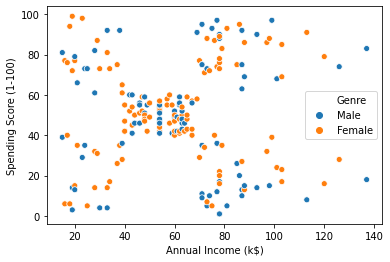

In [24]:
import seaborn as sns
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=dataset, hue='Genre')

In [25]:
X = dataset.iloc[:, [2, 3]]

Text(0, 0.5, 'WCSS')

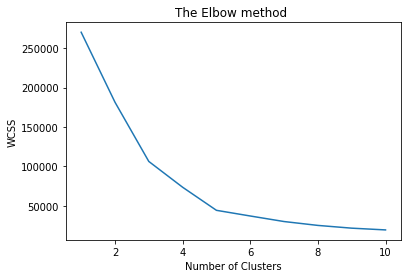

In [30]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmean = KMeans(n_clusters=i, random_state=42) # init is kmeans++ default
  kmean.fit(X)
  wcss.append(kmean.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method ')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [33]:
kmean = KMeans(n_clusters=5, random_state=42)
y_means = kmean.fit_predict(X)

In [34]:
print(y_means)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


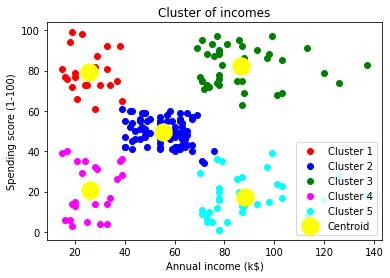

In [42]:
plt.scatter(X.iloc[y_means == 0,0], X.iloc[y_means == 0,1], c='red', label='Cluster 1')
plt.scatter(X.iloc[y_means == 1,0], X.iloc[y_means == 1,1], c='blue', label='Cluster 2')
plt.scatter(X.iloc[y_means == 2,0], X.iloc[y_means == 2,1], c='green', label='Cluster 3')
plt.scatter(X.iloc[y_means == 3,0], X.iloc[y_means == 3,1], c='magenta', label='Cluster 4')
plt.scatter(X.iloc[y_means == 4,0], X.iloc[y_means == 4,1], c='cyan', label='Cluster 5')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], s=300, c='yellow', label='Centroid')

plt.title('Cluster of incomes')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend(loc=4)